In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [2]:
query = 'select * from customers limit 4;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [3]:
query = 'show tables'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,sales
4,salesdata
5,subcategories
6,suppliers


In [4]:
query = 'select * from salesdata limit 3;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [5]:
query = """select s.customerid,c.firstname, s.saledate,s.totalprice
from salesdata s
join customers c
on s.customerid=c.customerid
limit 5;"""
read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-12,Farhan,2023-05-02,176432.00
1,C-2023-100-141,Nirvi,2023-12-26,47172.00
2,C-2023-100-86,Zaina,2023-03-26,47172.00
3,C-2023-100-72,Darshit,2023-08-01,117644.00
4,C-2023-100-142,Aarush,2023-03-06,336560.00


In [6]:
query = """
select t.customerid,c.firstname,t.expenditure
from
(select customerid,
sum(totalprice) as expenditure
from salesdata
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10;"""
top_annual_customers = read_query(query)


In [7]:
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [8]:
customernames = top_annual_customers['firstname'].values

In [9]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [10]:
top_annual_customers['expenditure']=top_annual_customers['expenditure'].astype(float)

In [11]:
customer_exp = top_annual_customers['expenditure'].values

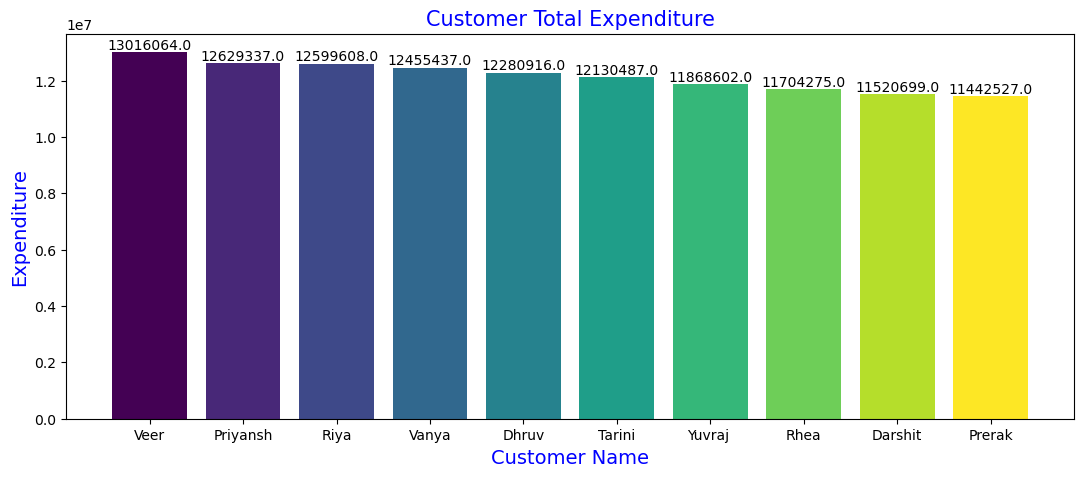

In [12]:
plt.figure(figsize=(13,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(customernames)))
bars = plt.bar(height=customer_exp,x=customernames,color=colors)

plt.title('Customer Total Expenditure',color='blue',fontsize=15)
plt.ylabel('Expenditure',color='blue',fontsize=14)
plt.xlabel('Customer Name',color='blue',fontsize=14)

for bar, exp in zip(bars, customer_exp):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp}', ha='center', va='bottom')

plt.savefig('top_annual_customers.jpeg')    


<h1 style=>

In [13]:
query = 'show tables'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,sales
4,salesdata
5,subcategories
6,suppliers


In [21]:
query = 'select * from salesdata limit 10;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [28]:
query = """select 
    monthname(s.saledate) as monthnames,
    e.firstname,
    sum(s.totalprice) as totalsales
from salesdata s
    join employees e
    on s.employeeid=e.employeeid
where monthname(saledate)='January'
group by monthname(s.saledate), e.firstname
limit 10;"""
df = read_query(query=query)

In [29]:
df['totalsales']=df['totalsales'].astype(float)

In [30]:
df

,monthnames,firstname,totalsales
0,January,Fateh,2918201.0
1,January,Chirag,2077526.0
2,January,Dhanush,1561304.0
3,January,Anika,3152408.0
4,January,Keya,204104.0
5,January,Samaira,874919.0
6,January,Vedika,2029205.0
7,January,Rhea,2091837.0
8,January,Seher,1101449.0
9,January,Diya,1552837.0


Q1 Provide a visual representation of our annual sales performance over time?

In [14]:
query = 'describe salesdata;'
read_query(query)

,Field,Type,Null,Key,Default,Extra
0,SaleID,int,NO,PRI,None,
1,CustomerID,varchar(50),YES,MUL,None,
2,SubcatID,int,YES,MUL,None,
3,EmployeeID,int,YES,MUL,None,
4,SaleDate,date,YES,,None,
5,Quantity,int,YES,,None,
6,TotalPrice,"decimal(10,2)",YES,,None,


In [15]:
query = """select months, monthlysales
from
(select month(saledate), monthname(saledate) as months,
sum(totalprice) as monthlysales
from salesdata
group by month(saledate), months
order by month(saledate)) t;"""

df = read_query(query)
df

,months,monthlysales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [16]:
months = df['months'].values
sales = df['monthlysales'].astype(float).values

In [17]:
annual_average = df['monthlysales'].mean()

In [18]:
goal = annual_average*1.05

In [19]:
sales

array([1.55340130e+08, 1.40345189e+08, 1.51612551e+08, 1.50691604e+08,
       1.63734120e+08, 1.43529379e+08, 1.49811843e+08, 1.58477094e+08,
       1.46743920e+08, 1.43488837e+08, 1.48468105e+08, 1.37031316e+08])

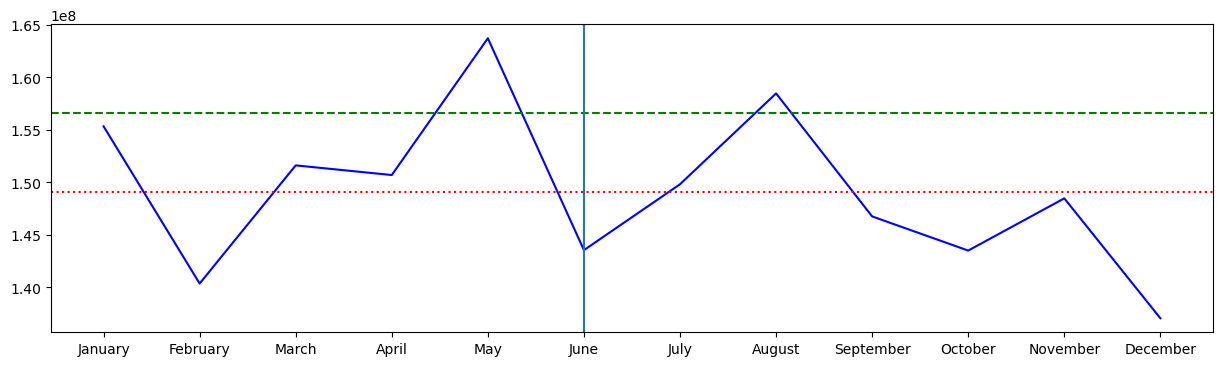

In [20]:
plt.figure(figsize=(15,4))
plt.plot(months,sales,color='blue')
plt.axhline(y=annual_average,color='red',ls='dotted')
plt.axhline(y=goal,color='green',ls='dashed')
plt.axvline(x=5)


Q2 The client is interested in understanding how the sales have been fluctuating over time to identify any underlying patterns or anomalies Analyze the trend in our monthly sales using a moving average technique.

In [38]:
query = """select months,
avg(monthlysales) over (order by monthnum rows between 3
preceding and current row) as Moving_Average
from
(select
month(saledate) monthnum,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
from Salesdata
Group by month(saledate),monthname(saledate)) t ;"""
df = read_query(query)
df

,months,Moving_Average
0,January,155340130.000000
1,February,147842659.500000
2,March,149099290.000000
3,April,149497368.500000
4,May,151595866.000000
5,June,152391913.500000
6,July,151941736.500000
7,August,153888109.000000
8,September,149640559.000000
9,October,149630423.500000


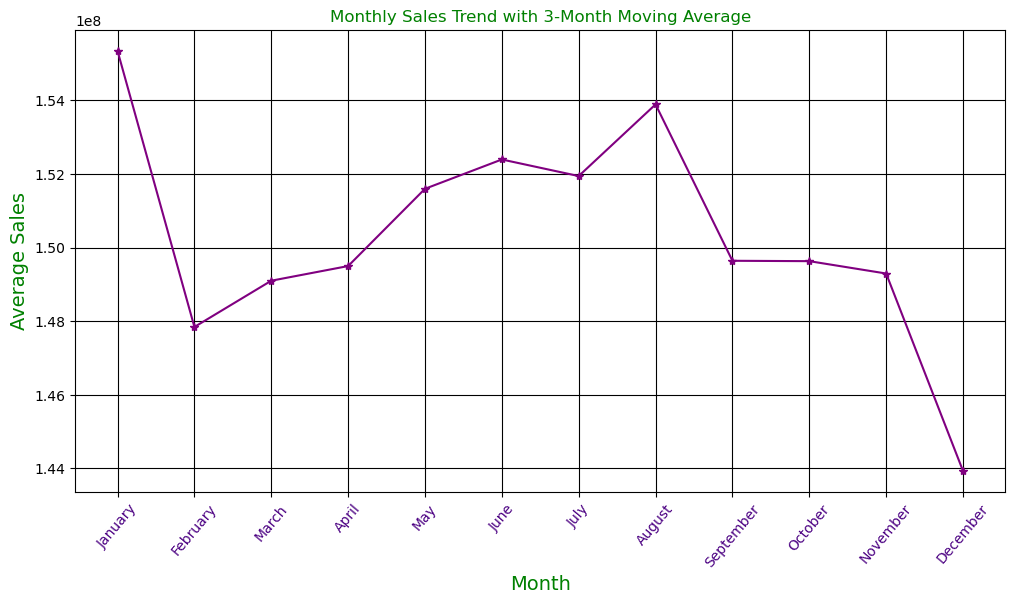

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df['months'], df['Moving_Average'], marker='*', linestyle='-',color='purple')
plt.title('Monthly Sales Trend with 3-Month Moving Average',color='Green')
plt.xlabel('Month',color='Green',fontsize=14)
plt.ylabel('Average Sales',color='Green',fontsize=14)
plt.grid(True,color='black')
plt.xticks(rotation=50,color='indigo')

plt.show()

Q3 Explore the month-over-month growth rate in sales.

In [53]:
query = """select months,
    100 * (monthlysales - LAG(monthlysales) over (order by month_num)) /
    LAG(monthlysales) over (order by month_num) as 'Growthrate in %'
from
    (select month(saledate) as month_num,
    monthname(saledate) as months,
    sum(totalprice) as monthlysales
    from salesdata
    group by month_num, months
    order by month_num) t
    order by month_num, months;"""
df = read_query(query)
df

,months,Growthrate in %
0,January,None
1,February,-9.652973
2,March,8.028321
3,April,-0.607435
4,May,8.655105
5,June,-12.339970
6,July,4.377128
7,August,5.784089
8,September,-7.403703
9,October,-2.218206


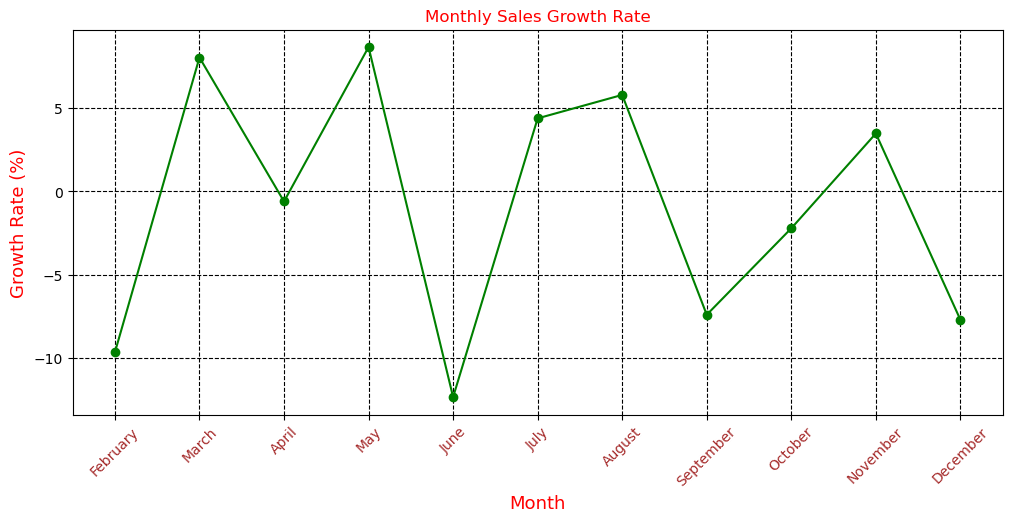

In [61]:
plt.figure(figsize=(12, 5))
plt.plot(df['months'], df['Growthrate in %'], marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Growth Rate',color='red')
plt.xlabel('Month',color='red',fontsize=13)
plt.ylabel('Growth Rate (%)',color='red',fontsize=13)
plt.grid(True,color='black',ls='--')
plt.xticks(rotation=45,color='brown')

plt.show()


Q4 identify the top-performing sales representatives based on their total sales volume.

In [64]:
query = """select t.employeeid,t.total_sales,e.firstname
from
(select employeeid,sum(totalprice) as total_sales
from salesdata
group by employeeid) t
join employees e
on t.employeeid=e.employeeid
order by t.total_sales desc;"""

df = read_query(query)
df

,employeeid,total_sales,firstname
0,1115,20895341.00,Yuvaan
1,1017,19035834.00,Tiya
2,1029,18649467.00,Shaan
3,1074,18333919.00,Stuvan
4,1001,18231579.00,Fateh
...,...,...,...
115,1005,11565845.00,Keya
116,1019,11412116.00,Nitara
117,1015,11399241.00,Heer
118,1072,10898982.00,Kimaya


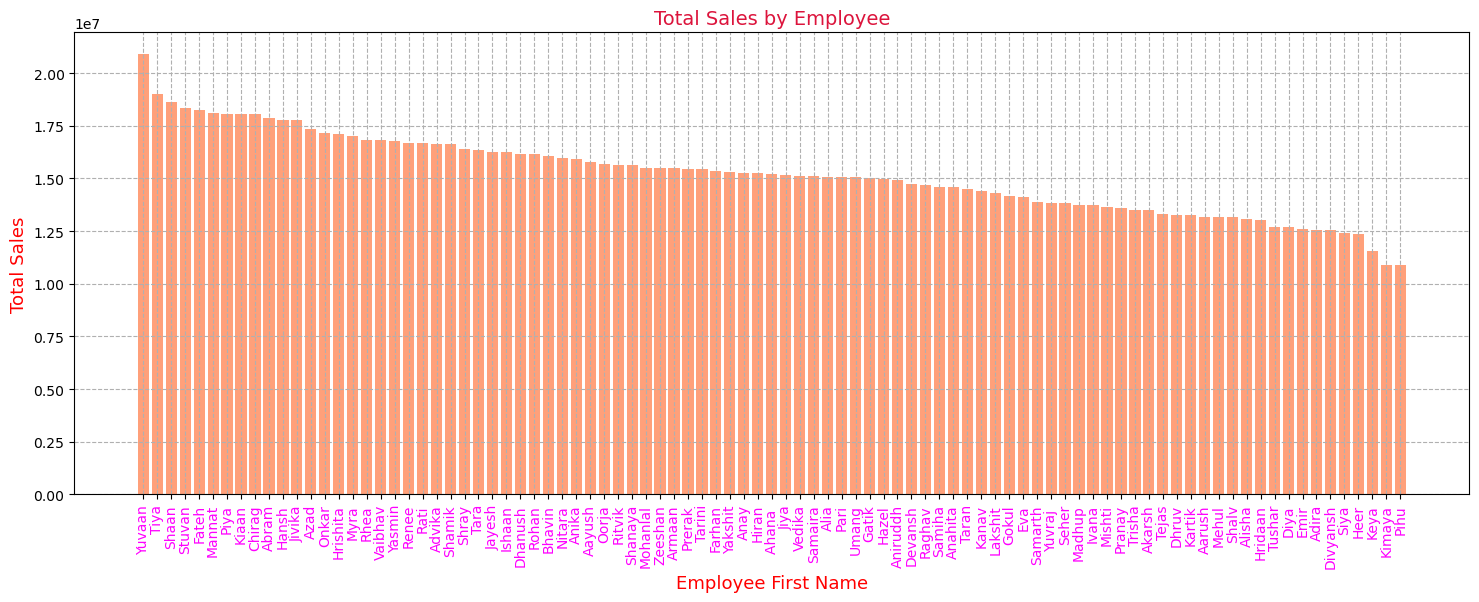

In [94]:
plt.figure(figsize=(18, 6))
plt.bar(df['firstname'], df['total_sales'], color='lightsalmon')
plt.title('Total Sales by Employee',color='crimson',fontsize=14)
plt.xlabel('Employee First Name',color='red',fontsize=13)
plt.ylabel('Total Sales',color='red',fontsize=13)
plt.grid(True,ls='--')

plt.xticks(rotation=90,color='magenta')

plt.show()



Q5 What are the total sales made by each employee?

In [95]:
query = """select
employeeid,sum(totalprice) as total_sales
from salesdata
group by employeeid;"""

df = read_query(query)
df

,employeeid,total_sales
0,1001,18231579.00
1,1002,18042772.00
2,1003,16151819.00
3,1004,13648670.00
4,1005,11565845.00
...,...,...
115,1116,17333826.00
116,1117,15910570.00
117,1118,12613265.00
118,1119,16623169.00


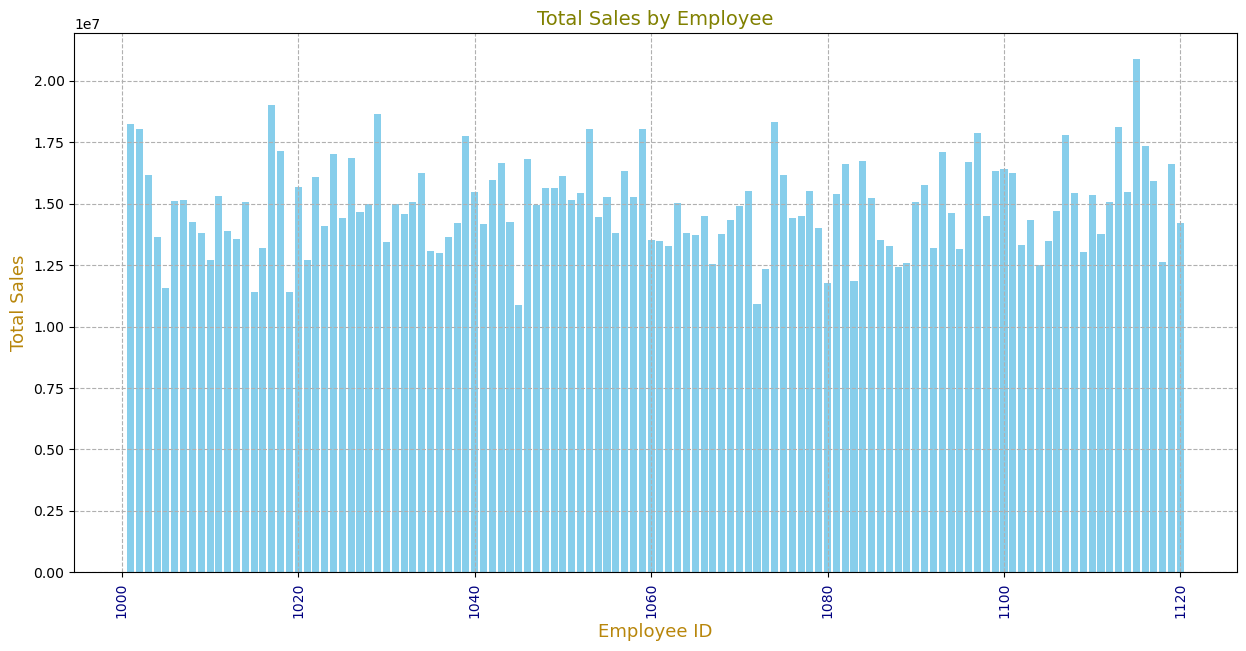

In [102]:
plt.figure(figsize=(15, 7))
plt.bar(df['employeeid'], df['total_sales'], color='skyblue')
plt.title('Total Sales by Employee',color='olive',fontsize=14)
plt.xlabel('Employee ID',color='darkgoldenrod',fontsize=13)
plt.ylabel('Total Sales',color='darkgoldenrod',fontsize=13)
plt.grid(True,ls='--')

plt.xticks(rotation=90,color='navy')

plt.show()

Q6 Which category has the highest total sales?

In [103]:
query = """select
c.categoryname,
sum(s.totalprice) as total_sales
from salesdata s
join subcategories sc on s.subcatid = sc.subcatid
join categories c on sc.categoryid = c.categoryid
group by c.categoryname
order by total_sales desc
limit 1;"""

df = read_query(query)
df

,categoryname,total_sales
0,Pet Supplies and Accessories,361848986.00


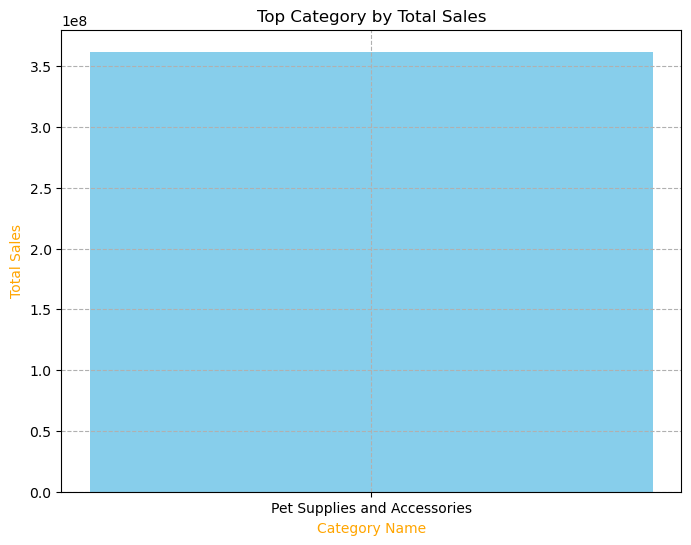

In [106]:
plt.figure(figsize=(8, 6))
plt.bar(df['categoryname'], df['total_sales'], color='skyblue')
plt.title('Top Category by Total Sales')
plt.xlabel('Category Name',color='orange')
plt.ylabel('Total Sales',color='orange')
plt.grid(True,ls='--')

plt.show()

Q7 How many customers are there in each state?

In [107]:
query = """select state,
count(*) as total_customers
from customers
group by state
order by total_customers desc;"""

df = read_query(query)
df

,state,total_customers
0,Manipur,14
1,Goa,14
2,Bihar,14
3,Nagaland,11
4,Himachal Pradesh,11
5,Arunachal Pradesh,11
6,Karnataka,11
7,Assam,10
8,Tripura,10
9,Chhattisgarh,10


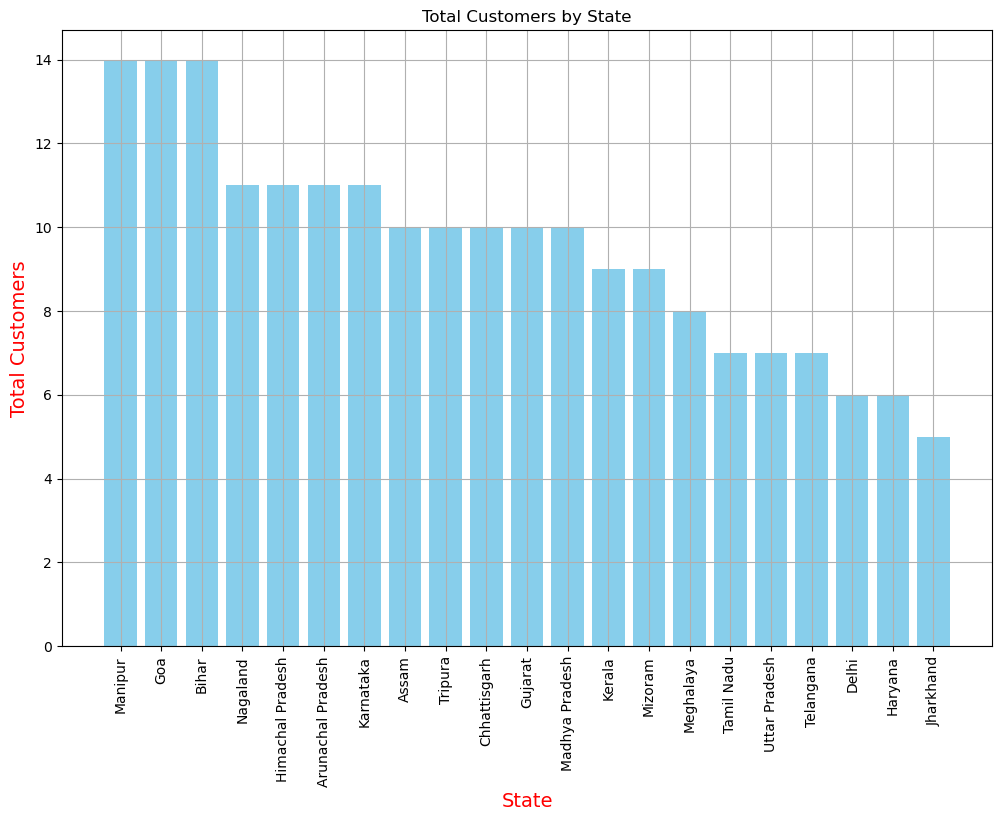

In [116]:
plt.figure(figsize=(12, 8))
plt.bar(df['state'], df['total_customers'], color='skyblue')
plt.title('Total Customers by State')
plt.xlabel('State',color='red',fontsize=14)
plt.ylabel('Total Customers',color='red',fontsize=14)
plt.grid(True)

plt.xticks(rotation=90)

plt.show()



Q8 What is the average quantity of each product sold?

In [117]:
query = """select
s.subcatid,
sb.subcatname,
avg(quantity) as Avg_quantity_sold
from salesdata s
join subcategories sb 
on s.subcatid=sb.subcatid
group by s.subcatid,sb.subcatname;"""

df = read_query(query)
df

,subcatid,subcatname,Avg_quantity_sold
0,6001,Smartphones,2.9975
1,6002,Laptops,3.0821
2,6003,Smartwatches,2.9302
3,6004,Wireless headphones,2.9562
4,6005,Portable power banks,3.0974
5,6006,Coffee maker,2.9693
6,6007,Air fryer,2.9163
7,6008,Robot vacuum cleaner,2.9364
8,6009,Instant Pot,3.0229
9,6010,Blender,2.9738


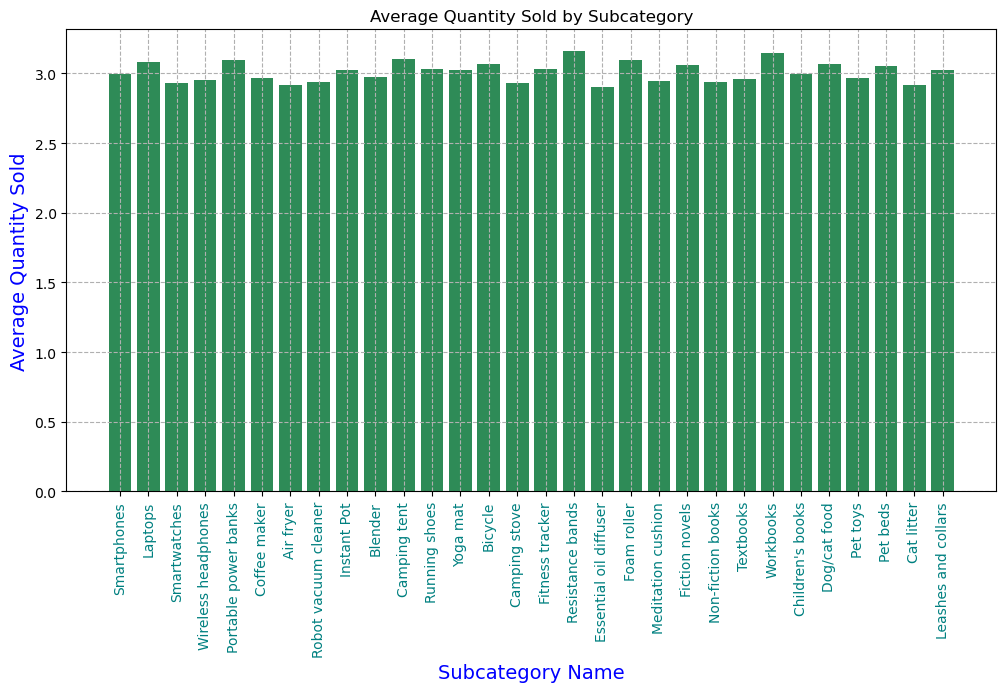

In [124]:
plt.figure(figsize=(12, 6))
plt.bar(df['subcatname'], df['Avg_quantity_sold'], color='seagreen')
plt.title('Average Quantity Sold by Subcategory')
plt.xlabel('Subcategory Name',color='blue',fontsize=14)
plt.ylabel('Average Quantity Sold',color='blue',fontsize=14)
plt.grid(True,ls='--')

plt.xticks(rotation=90,color='teal')

plt.show()

Q9 Which supplier has the highest total sales?

In [125]:
query = """select suppliername,sum(totalprice) as total_sales
from salesdata s
join subcategories sc on s.subcatid = sc.subcatid
join suppliers su on sc.supplierid = su.supplierid
group by suppliername
order by total_sales desc
limit 1;"""

df = read_query(query)
df

,suppliername,total_sales
0,Dora-Aggarwal,180265340.00


Q10 What is the total revenue generated from sales in each state?

In [126]:
query = """select c.state,sum(s.totalprice) as total_revenue
from salesdata s
join customers c on s.customerid = c.customerid
group by c.state;"""

df = read_query(query)
df

,state,total_revenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00
5,Delhi,53744487.00
6,Mizoram,76073281.00
7,Haryana,51660214.00
8,Chhattisgarh,91546717.00
9,Himachal Pradesh,102905140.00


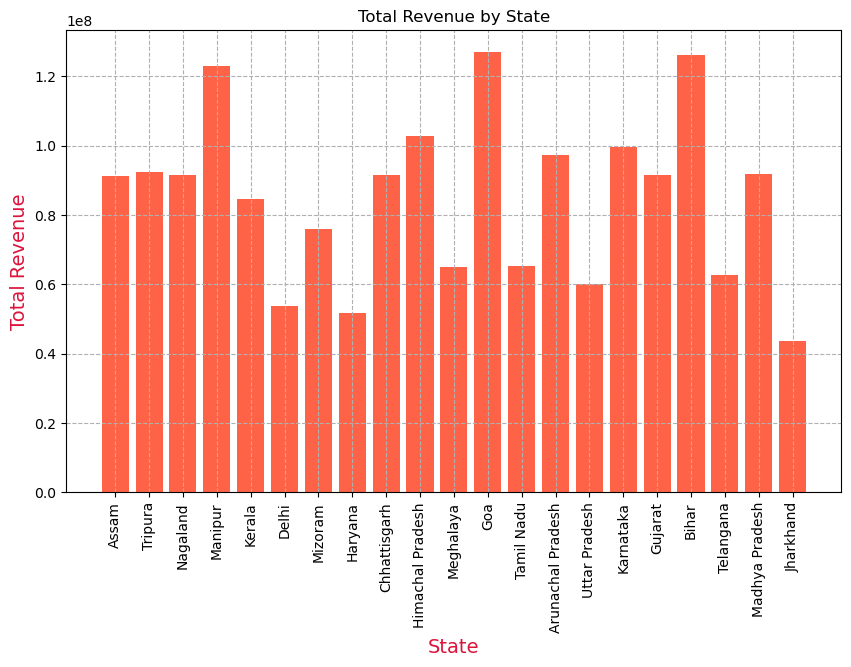

In [129]:
plt.figure(figsize=(10, 6))
plt.bar(df['state'], df['total_revenue'], color='tomato')
plt.title('Total Revenue by State')
plt.xlabel('State',color='crimson',fontsize=14)
plt.ylabel('Total Revenue',color='crimson',fontsize=14)
plt.grid(True,ls='--')

plt.xticks(rotation=90)

plt.show()

Q11 How many sales were made by each customer?

In [130]:
query = """select s.customerid,c.firstname,count(*) as total_sales
from salesdata s
join customers c
on s.customerid=c.customerid
group by s.customerid,c.firstname
order by total_sales desc;"""

df = read_query(query)
df


,customerid,firstname,total_sales
0,C-2023-100-13,Veer,85
1,C-2023-100-130,Amira,81
2,C-2023-100-197,Yuvraj,81
3,C-2023-100-88,Dhruv,78
4,C-2023-100-57,Riya,77
...,...,...,...
195,C-2023-100-138,Saksham,46
196,C-2023-100-103,Anvi,45
197,C-2023-100-150,Taran,44
198,C-2023-100-9,Vaibhav,44


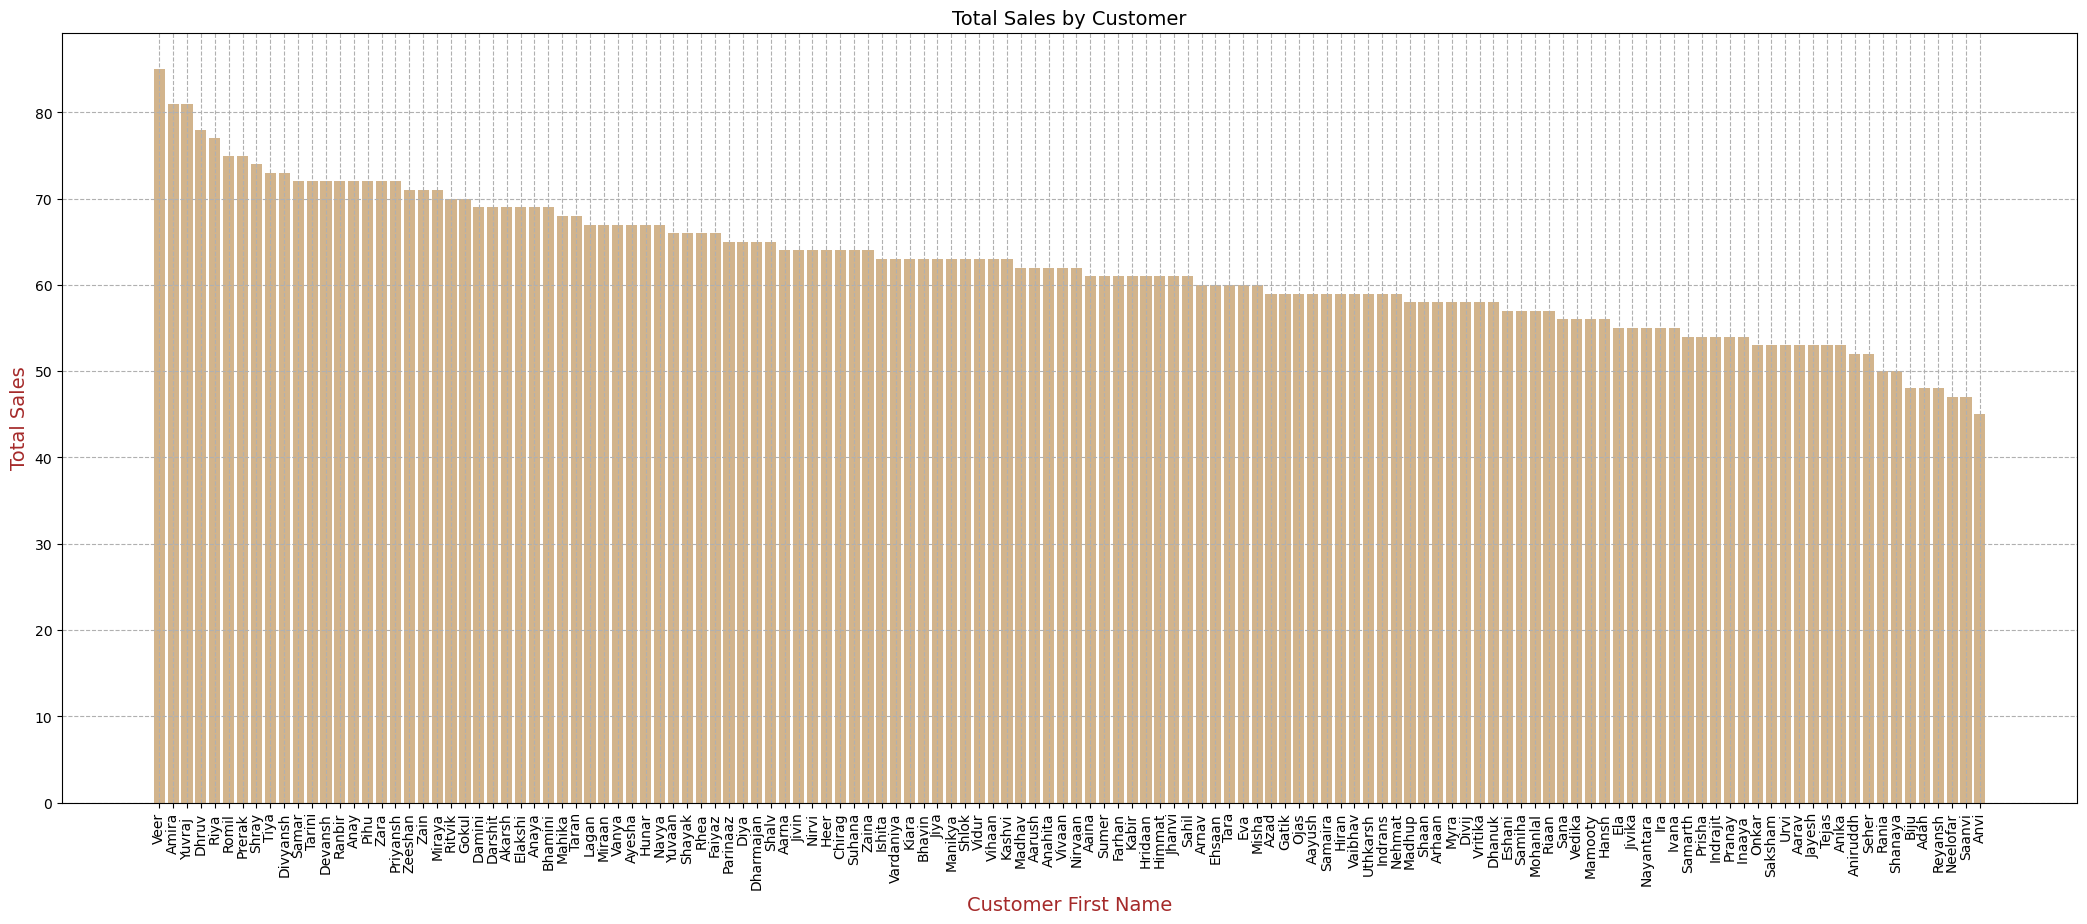

In [141]:
plt.figure(figsize=(26, 10))
plt.bar(df['firstname'], df['total_sales'], color='tan')
plt.title('Total Sales by Customer',fontsize=14)
plt.xlabel('Customer First Name',color='brown',fontsize=14)
plt.ylabel('Total Sales',color='brown',fontsize=14)
plt.grid(True,ls='--')

plt.xticks(rotation=90)

plt.show()

Q12 What is the total salary expenditure on employees in each department?

In [142]:
query = """select department,sum(salary) as Total_salary_expenditure
from employees
group by department;"""

df = read_query(query)
df

,department,Total_salary_expenditure
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92
5,ML Engineer,652081.28
6,HR Admin,482618.09
7,Engineering,393266.08
8,Analyst,732044.77
9,IT,351627.51


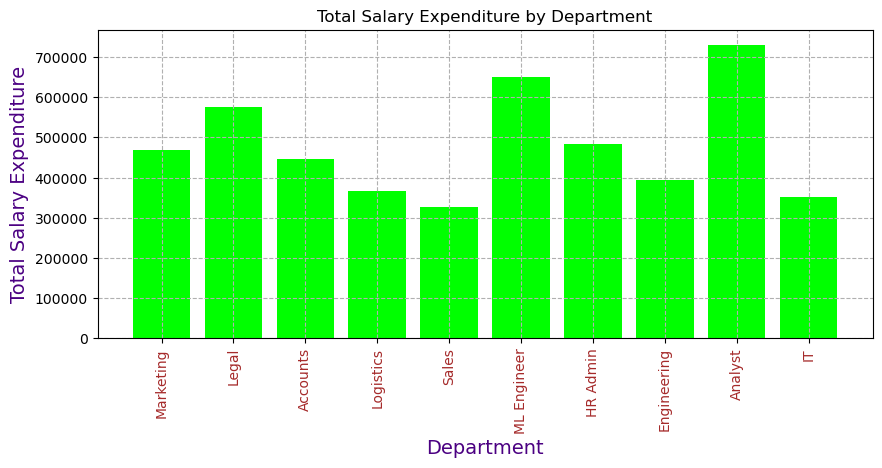

In [147]:
plt.figure(figsize=(10, 4))
plt.bar(df['department'], df['Total_salary_expenditure'], color='lime')
plt.title('Total Salary Expenditure by Department')
plt.xlabel('Department',color='indigo',fontsize=14)
plt.ylabel('Total Salary Expenditure',color='indigo',fontsize=14)
plt.grid(True,ls='--')

plt.xticks(rotation=90,color='brown')

plt.show()

Q13 Which subcategory has the highest average unit price?

In [148]:
query = """select subcatname,avg(unitprice) as Avg_selling_price
from subcategories
group by subcatname
order by Avg_selling_price desc
LIMIT 3;"""

df = read_query(query)
df

,subcatname,Avg_selling_price
0,Pet beds,94029.000000
1,Laptops,88216.000000
2,Air fryer,85039.000000


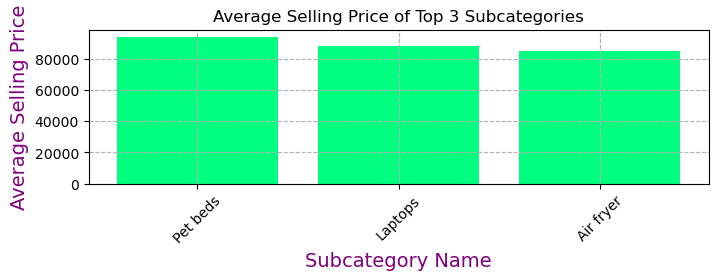

In [151]:
plt.figure(figsize=(8, 2))
plt.bar(df['subcatname'], df['Avg_selling_price'], color='springgreen')
plt.title('Average Selling Price of Top 3 Subcategories')
plt.xlabel('Subcategory Name',color='purple',fontsize=14)
plt.ylabel('Average Selling Price',color='purple',fontsize=14)
plt.grid(True,ls='--')

plt.xticks(rotation=45)

plt.show()

Q14 What is the total revenue generated from sales in each category?

In [152]:
query = """select c.categoryname,sum(s.totalprice) as total_revenue
from salesdata s
join subcategories sc on s.subcatid = sc.subcatid
join categories c on sc.categoryid = c.categoryid
group by c.categoryName;"""

df = read_query(query)
df

,categoryname,total_revenue
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00
5,Pet Supplies and Accessories,361848986.00


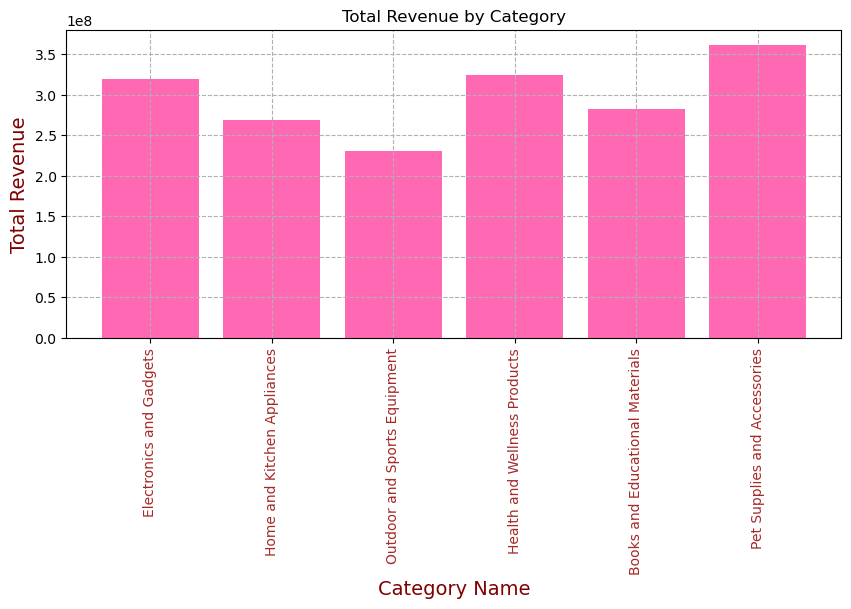

In [156]:
plt.figure(figsize=(10, 4))
plt.bar(df['categoryname'], df['total_revenue'], color='hotpink')
plt.title('Total Revenue by Category')
plt.xlabel('Category Name',color='maroon',fontsize=14)
plt.ylabel('Total Revenue',color='maroon',fontsize=14)
plt.grid(True,ls='--')

plt.xticks(rotation=90,color='brown')

plt.show()